In [56]:
import pandas as pd
import datetime

In [57]:
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [58]:
# Leemos el DataFrame
covid = pd.read_csv("owid-covid-data.csv")

In [59]:
# Cambiamos el formato de la columna data a datetime
covid['date'] = pd.to_datetime(covid['date'], format='%Y-%m-%d')

In [62]:
# Renombramos la columna "location" y la llamamos "country"
covid.rename(columns={"location": "country", "human_development_index": "HDI"}, inplace=True)

In [200]:
covid

,iso_code,continent,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,HDI
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89674,ZWE,Africa,Zimbabwe,2021-05-14,38535.0,44.0,18.857,1582.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
89675,ZWE,Africa,Zimbabwe,2021-05-15,38554.0,19.0,20.000,1582.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
89676,ZWE,Africa,Zimbabwe,2021-05-16,38560.0,6.0,20.143,1582.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
89677,ZWE,Africa,Zimbabwe,2021-05-17,38572.0,12.0,19.857,1582.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [63]:
# Muestro la información para saber de qué type es cada columna
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89679 entries, 0 to 89678
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               89679 non-null  object        
 1   continent                              85406 non-null  object        
 2   country                                89679 non-null  object        
 3   date                                   89679 non-null  datetime64[ns]
 4   total_cases                            86654 non-null  float64       
 5   new_cases                              86652 non-null  float64       
 6   new_cases_smoothed                     85651 non-null  float64       
 7   total_deaths                           76856 non-null  float64       
 8   new_deaths                             77014 non-null  float64       
 9   new_deaths_smoothed                    85651 non-null  float6

In [72]:
# A continuación quiero crear un nuevo DataFrame con sólo las columnas : pais, nº de casos, nº de muertes y PIB

ratio_deaths = covid.filter(["country", "total_cases", "total_deaths", "gdp_per_capita", "HDI"], axis=1)
ratio_deaths = ratio_deaths.dropna()
ratio_deaths.reset_index(drop=True, inplace=True)
ratio_deaths

,country,total_cases,total_deaths,gdp_per_capita,HDI
0,Afghanistan,34.0,1.0,1803.987,0.511
1,Afghanistan,41.0,1.0,1803.987,0.511
2,Afghanistan,43.0,1.0,1803.987,0.511
3,Afghanistan,76.0,2.0,1803.987,0.511
4,Afghanistan,80.0,3.0,1803.987,0.511
...,...,...,...,...,...
69412,Zimbabwe,38535.0,1582.0,1899.775,0.571
69413,Zimbabwe,38554.0,1582.0,1899.775,0.571
69414,Zimbabwe,38560.0,1582.0,1899.775,0.571
69415,Zimbabwe,38572.0,1582.0,1899.775,0.571


In [203]:
ratio_deaths[ratio_deaths["country"] == "Singapore"]

,country,total_cases,total_deaths,gdp_per_capita,HDI,hospital_beds_per_thousand
49881,Singapore,432.0,2.0,85535.383,0.938,2.4
49882,Singapore,455.0,2.0,85535.383,0.938,2.4
49883,Singapore,509.0,2.0,85535.383,0.938,2.4
49884,Singapore,558.0,2.0,85535.383,0.938,2.4
49885,Singapore,631.0,2.0,85535.383,0.938,2.4
...,...,...,...,...,...,...
50300,Singapore,61505.0,31.0,85535.383,0.938,2.4
50301,Singapore,61536.0,31.0,85535.383,0.938,2.4
50302,Singapore,61585.0,31.0,85535.383,0.938,2.4
50303,Singapore,61613.0,31.0,85535.383,0.938,2.4


In [73]:
# Agrupamos por paises sacando el valor actual de casos, muertes y pib
ratio_deaths_grouby = ratio_deaths.groupby("country").max()
ratio_deaths_grouby

,total_cases,total_deaths,gdp_per_capita,HDI
country,,,,
Afghanistan,63819.0,2751.0,1803.987,0.511
Albania,132071.0,2436.0,11803.431,0.795
Algeria,125693.0,3388.0,13913.839,0.748
Angola,31045.0,685.0,5819.495,0.581
Antigua and Barbuda,1251.0,42.0,21490.943,0.778
...,...,...,...,...
Vietnam,4512.0,37.0,6171.884,0.704
World,164231810.0,3404338.0,15469.207,0.737
Yemen,6586.0,1297.0,1479.147,0.470


C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gdp_per_capita'>

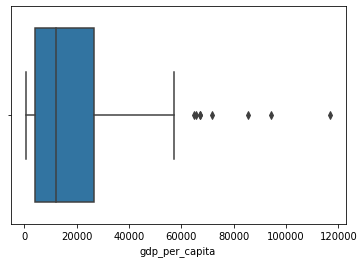

In [191]:
sns.boxplot(ratio_deaths_grouby["gdp_per_capita"])

C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HDI'>

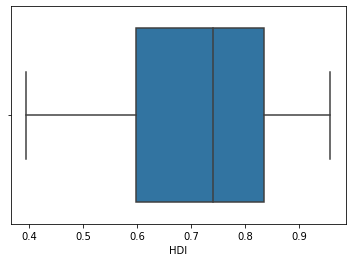

In [202]:
sns.boxplot(ratio_deaths_grouby["HDI"])

In [199]:
ratio_deaths_grouby[ratio_deaths_grouby["gdp_per_capita"] > 50000].sort_values("gdp_per_capita", ascending=False)

,total_cases,total_deaths,gdp_per_capita,HDI,deaths_ratio
country,,,,,
Qatar,213855.0,536.0,116935.600,0.848,0.250637
Luxembourg,69239.0,808.0,94277.965,0.916,1.166972
Singapore,61651.0,31.0,85535.383,0.938,0.050283
Brunei,232.0,3.0,71809.251,0.838,1.293103
Ireland,254870.0,4941.0,67335.293,0.955,1.938635
United Arab Emirates,548681.0,1637.0,67293.483,0.890,0.298352
Kuwait,293574.0,1701.0,65530.537,0.806,0.579411
Norway,119814.0,774.0,64800.057,0.957,0.646001
Switzerland,683400.0,10752.0,57410.166,0.955,1.573310


In [74]:
# Añadimos una nueva columna con el ratio de muertes, y los ordenamos de mayor a menor según el ratio de muertes

ratio_deaths_grouby["deaths_ratio"] = ratio_deaths_grouby["total_deaths"]/ratio_deaths_grouby["total_cases"] * 100
ratio_deaths_grouby.sort_values(by="HDI", ascending=False)

,total_cases,total_deaths,gdp_per_capita,HDI,deaths_ratio
country,,,,,
Norway,119814.0,774.0,64800.057,0.957,0.646001
Switzerland,683400.0,10752.0,57410.166,0.955,1.573310
Ireland,254870.0,4941.0,67335.293,0.955,1.938635
Iceland,6549.0,29.0,46482.958,0.949,0.442816
Germany,3615896.0,86671.0,45229.245,0.947,2.396944
...,...,...,...,...,...
Burundi,4353.0,6.0,702.225,0.433,0.137836
South Sudan,10652.0,115.0,1569.888,0.433,1.079609
Chad,4905.0,173.0,1768.153,0.398,3.527013


In [145]:
ratio_deaths_grouby.sort_values(by="gdp_per_capita", ascending=False)

,total_cases,total_deaths,gdp_per_capita,HDI,deaths_ratio
country,,,,,
Qatar,213855.0,536.0,116935.600,0.848,0.250637
Luxembourg,69239.0,808.0,94277.965,0.916,1.166972
Singapore,61651.0,31.0,85535.383,0.938,0.050283
Brunei,232.0,3.0,71809.251,0.838,1.293103
Ireland,254870.0,4941.0,67335.293,0.955,1.938635
...,...,...,...,...,...
Niger,5348.0,192.0,926.000,0.394,3.590127
Democratic Republic of Congo,30620.0,776.0,808.133,0.480,2.534291
Liberia,2131.0,85.0,752.788,0.480,3.988738


In [179]:
sorted_deaths_head = ratio_deaths_grouby.sort_values(by="deaths_ratio", ascending=False).head(20)
sorted_deaths_tail = ratio_deaths_grouby.sort_values(by="deaths_ratio", ascending=False).tail(20)
sorted_deaths_head.reset_index(inplace=True)
sorted_deaths_tail.reset_index(inplace=True)
sorted_deaths_complete = sorted_deaths_head.append(sorted_deaths_tail)
sorted_deaths_complete.reset_index(inplace=True)
sorted_deaths_complete


,index,country,total_cases,total_deaths,gdp_per_capita,HDI,deaths_ratio
0,0,Vanuatu,4.0,1.0,2921.909,0.609,25.000000
1,1,Yemen,6586.0,1297.0,1479.147,0.470,19.693289
2,2,Mexico,2385512.0,220746.0,17336.469,0.779,9.253611
3,3,Sudan,34889.0,2446.0,4466.507,0.510,7.010806
4,4,Egypt,248078.0,14441.0,10550.206,0.707,5.821153
5,5,Ecuador,411466.0,19877.0,10581.936,0.759,4.830776
6,6,China,102784.0,4846.0,15308.712,0.761,4.714742
7,7,Bosnia and Herzegovina,202675.0,9070.0,11713.895,0.780,4.475145
8,8,Afghanistan,63819.0,2751.0,1803.987,0.511,4.310628
9,9,Bulgaria,415326.0,17379.0,18563.307,0.816,4.184424


In [183]:
sorted_gdp_head = ratio_deaths_grouby.sort_values(by="gdp_per_capita", ascending=False).head(20)
sorted_gdp_tail = ratio_deaths_grouby.sort_values(by="gdp_per_capita", ascending=False).tail(20)
sorted_gdp_head.reset_index(inplace=True)
sorted_gdp_tail.reset_index(inplace=True)
sorted_gdp_complete = sorted_gdp_head.append(sorted_gdp_tail)
sorted_gdp_complete.reset_index(inplace=True)
sorted_gdp_complete

,index,country,total_cases,total_deaths,gdp_per_capita,HDI,deaths_ratio
0,0,Qatar,213855.0,536.0,116935.600,0.848,0.250637
1,1,Luxembourg,69239.0,808.0,94277.965,0.916,1.166972
2,2,Singapore,61651.0,31.0,85535.383,0.938,0.050283
3,3,Brunei,232.0,3.0,71809.251,0.838,1.293103
4,4,Ireland,254870.0,4941.0,67335.293,0.955,1.938635
5,5,United Arab Emirates,548681.0,1637.0,67293.483,0.890,0.298352
6,6,Kuwait,293574.0,1701.0,65530.537,0.806,0.579411
7,7,Norway,119814.0,774.0,64800.057,0.957,0.646001
8,8,Switzerland,683400.0,10752.0,57410.166,0.955,1.573310
9,9,United States,32997331.0,587219.0,54225.446,0.926,1.779595


<AxesSubplot:xlabel='deaths_ratio', ylabel='country'>

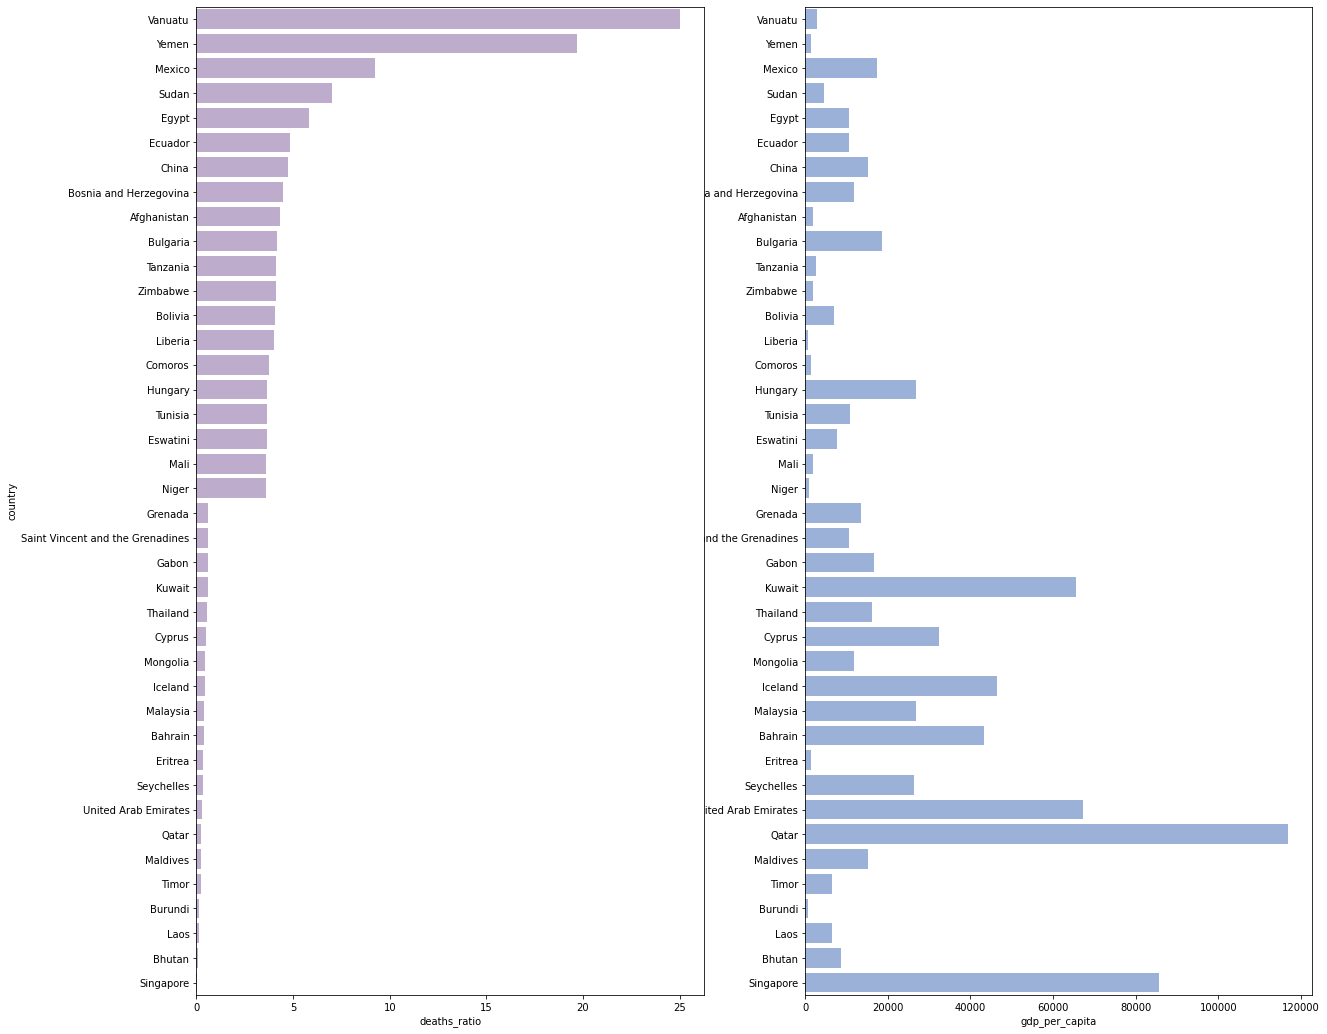

In [190]:
plt.figure(figsize=(20,40))
plt.subplot(2,2,2) #filas, columnas, a cual de los dos lienzos quiero acceder
sns.barplot(x="gdp_per_capita", y="country", data=sorted_deaths_complete, color="b", alpha=0.6, label="gdp_per_capita")

plt.subplot(2,2,1) #filas, columnas, a cual de los dos lienzos quiero acceder
sns.barplot(x="deaths_ratio", y="country", data=sorted_deaths_complete, color="m", alpha=0.6, label="deaths_ratio")

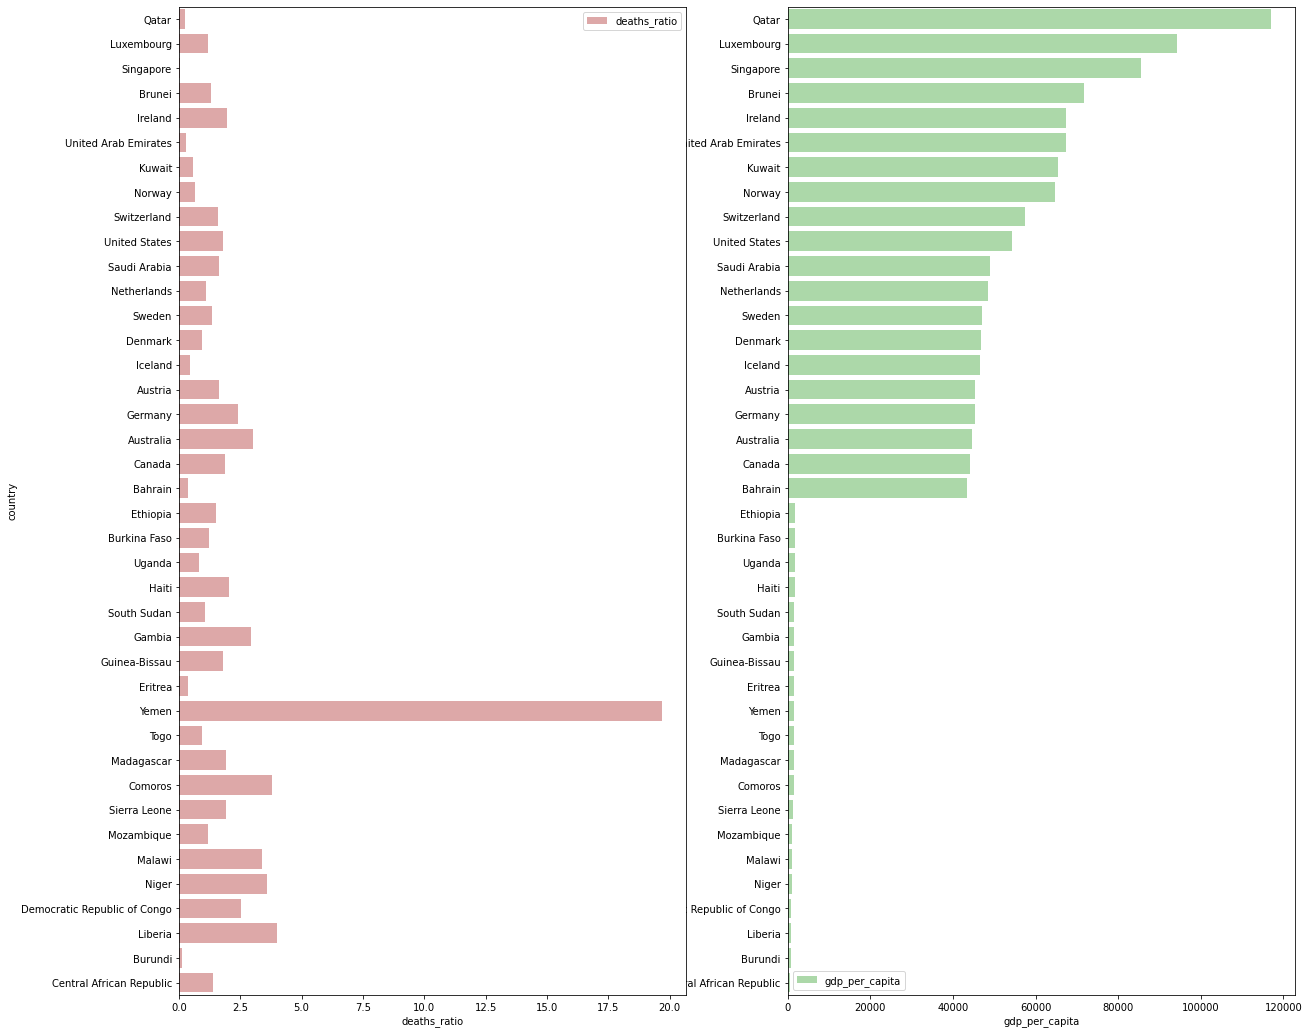

In [188]:
plt.figure(figsize=(20,40))
plt.subplot(2,2,2) #filas, columnas, a cual de los dos lienzos quiero acceder
sns.barplot(x="gdp_per_capita", y="country", data=sorted_gdp_complete, color="g", alpha=0.6, label="gdp_per_capita")
plt.legend()

plt.subplot(2,2,1) #filas, columnas, a cual de los dos lienzos quiero acceder
sns.barplot(x="deaths_ratio", y="country", data=sorted_gdp_complete, color="r", alpha=0.6, label="deaths_ratio")
plt.legend()


<AxesSubplot:xlabel='deaths_ratio', ylabel='country'>

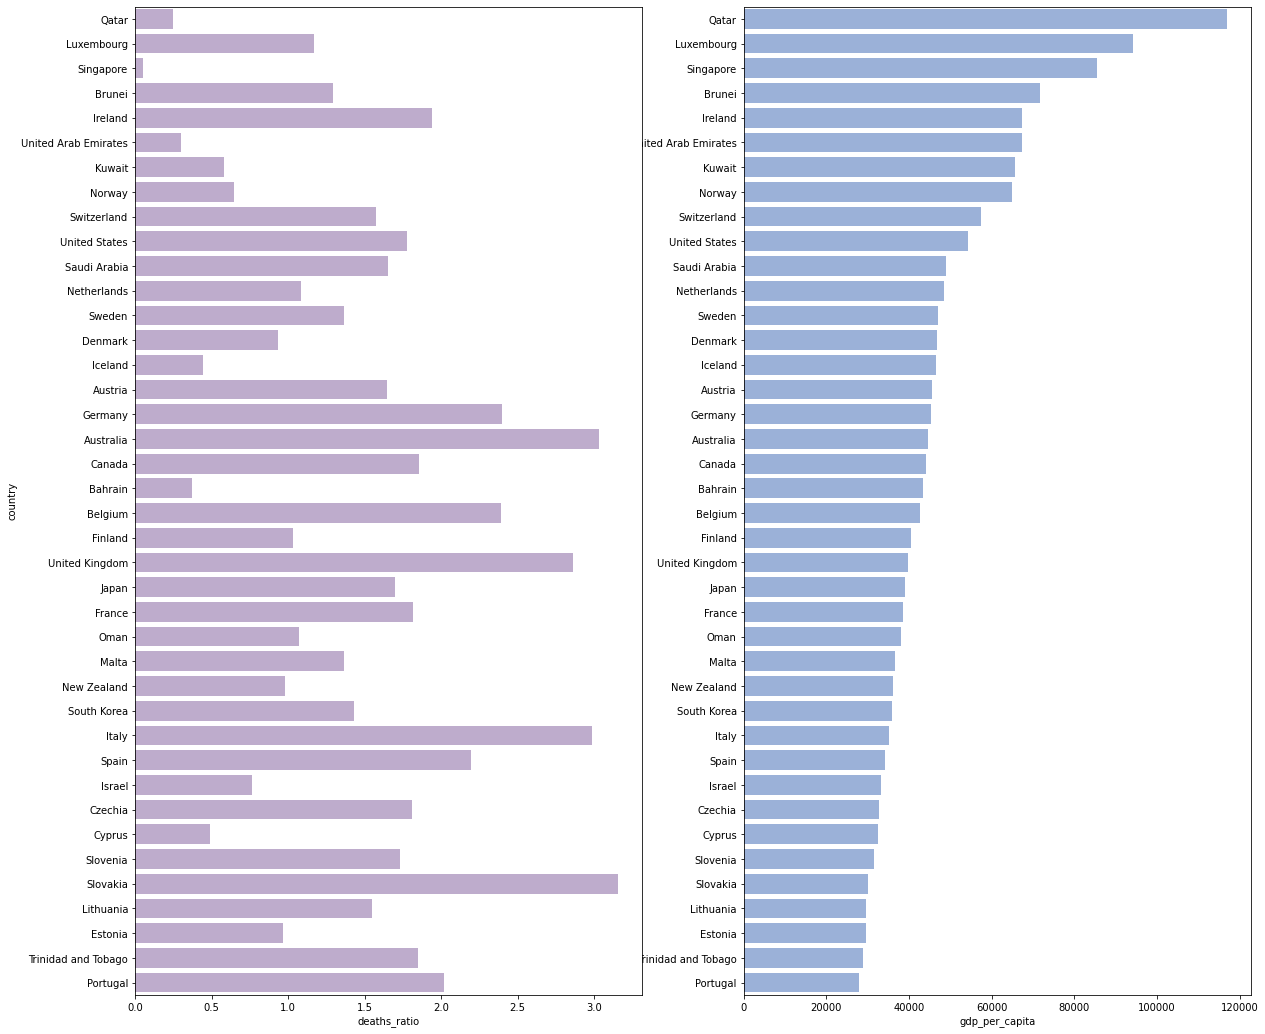

In [174]:
plt.figure(figsize=(20,40))
plt.subplot(2,2,2) #filas, columnas, a cual de los dos lienzos quiero acceder
sns.barplot(x="gdp_per_capita", y="country", data=sorted_gdp_head, color="b", alpha=0.6, label="gdp_per_capita")

plt.subplot(2,2,1) #filas, columnas, a cual de los dos lienzos quiero acceder
sns.barplot(x="deaths_ratio", y="country", data=sorted_gdp_head, color="m", alpha=0.6, label="deaths_ratio")

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,2) #filas, columnas, a cual de los dos lienzos quiero acceder
sns.barplot(x="gdp_per_capita", y="country", data=sorted_deaths_gdp, color="b", alpha=0.6, label="gdp_per_capita")

plt.subplot(2,2,2) #filas, columnas, a cual de los dos lienzos quiero acceder
sns.barplot(x="gdp_per_capita", y="country", data=sorted_deaths_head, color="g", alpha=0.6, label="gdp_per_capita")

plt.subplot(2,2,1) #filas, columnas, a cual de los dos lienzos quiero acceder
sns.barplot(x="deaths_ratio", y="country", data=sorted_deaths_gdp, color="m", alpha=0.6, label="deaths_ratio")

In [77]:
# Filtramos la tabla por edades para saber el porcentaje de las personas mayores de 55, mayores de 65 y mayores de 70 para poder relacionarlo también con el ratio de muertes

age = covid.filter(["country", "median_age", "aged_65_older", "aged_70_older", "total_cases", "total_deaths", "gdp_per_capita" ], axis=1)
age.dropna(inplace=True)

# Agrupamos por países

age = age.groupby("country").max()

# Creamos la variable deaths ratio

age["deaths_ratio"] = age["total_deaths"]/ratio_deaths_grouby["total_cases"] * 100

# Elimino las columnas que no voy a utilizar

age.drop("total_cases", axis=1, inplace=True)
age.drop("total_deaths", axis=1, inplace=True)

# Creamos dos columnas con el porcentaje de personas con más riesgo y menos
age["non_risky_age"] = 100 - age["aged_65_older"] - age["aged_70_older"]
age["risky_age"] = 100 - age["non_risky_age"]
age[["median_age", "aged_65_older", "aged_70_older", "non_risky_age", "risky_age", "deaths_ratio" ]]
age.sort_values(by="risky_age", ascending=False)

,median_age,aged_65_older,aged_70_older,gdp_per_capita,deaths_ratio,non_risky_age,risky_age
country,,,,,,,
Japan,48.2,27.049,18.493,39002.223,1.700532,54.458,45.542
Italy,47.9,23.021,16.240,35220.084,2.987671,60.739,39.261
Germany,46.6,21.453,15.957,45229.245,2.396944,62.590,37.410
Portugal,46.2,21.502,14.924,27936.896,2.018470,63.574,36.426
Greece,45.3,20.396,14.524,24574.382,3.025185,65.080,34.920
...,...,...,...,...,...,...,...
Gambia,17.5,2.339,1.417,1561.767,2.937720,96.244,3.756
Uganda,16.4,2.168,1.308,1697.707,0.812951,96.524,3.476
Kuwait,33.7,2.345,1.114,65530.537,0.579411,96.541,3.459


In [127]:
age_sorted = age.sort_values(by="deaths_ratio", ascending=False).head(20)
age_sorted.reset_index(inplace=True)
age_sorted

,country,median_age,aged_65_older,aged_70_older,gdp_per_capita,deaths_ratio,non_risky_age,risky_age
0,Vanuatu,23.1,4.394,2.620,2921.909,25.000000,92.986,7.014
1,Yemen,20.3,2.922,1.583,1479.147,19.693289,95.495,4.505
2,Mexico,29.3,6.857,4.321,17336.469,9.253611,88.822,11.178
3,Sudan,19.7,3.548,2.034,4466.507,7.010806,94.418,5.582
4,Egypt,25.3,5.159,2.891,10550.206,5.821153,91.950,8.050
5,Ecuador,28.1,7.104,4.458,10581.936,4.830776,88.438,11.562
6,China,38.7,10.641,5.929,15308.712,4.714742,83.430,16.570
7,Bosnia and Herzegovina,42.5,16.569,10.711,11713.895,4.475145,72.720,27.280
8,Afghanistan,18.6,2.581,1.337,1803.987,4.310628,96.082,3.918
9,Bulgaria,44.7,20.801,13.272,18563.307,4.184424,65.927,34.073


In [ ]:
sns.displot()

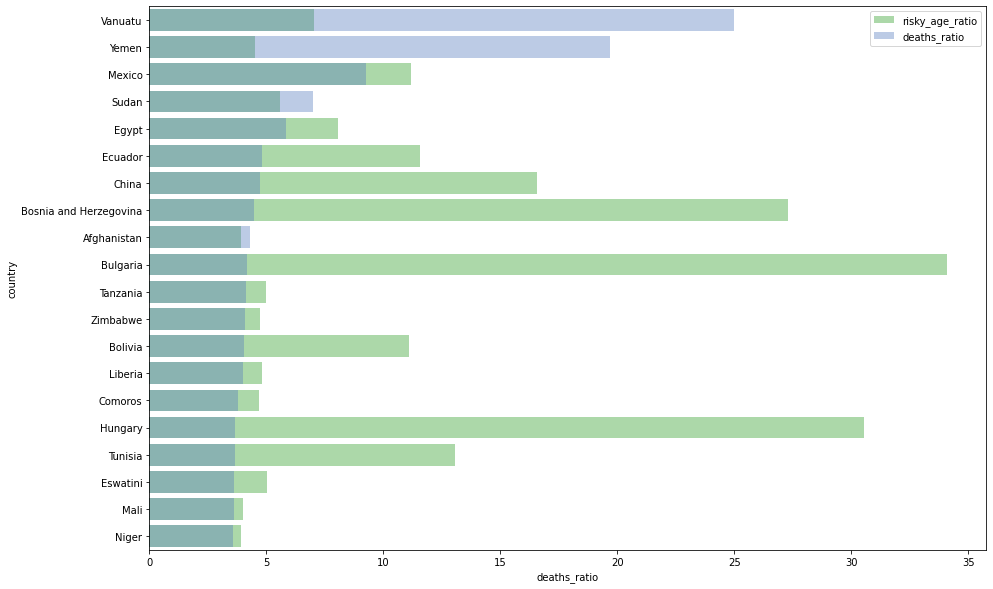

In [148]:
plt.figure(figsize=(15,10))
sns.set_color_codes("muted")
sns.barplot(x="risky_age", y="country", data=age_sorted, color="g", alpha=0.6, label="risky_age_ratio")
sns.barplot(x="deaths_ratio", y="country", data=age_sorted, color="b", alpha=0.4, label="deaths_ratio")
plt.legend()

<AxesSubplot:>

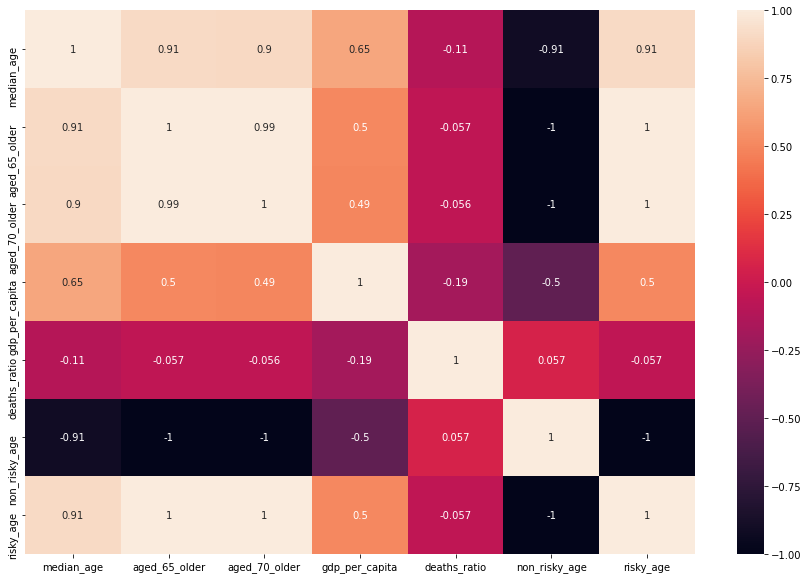

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(age.corr(),annot=True)

In [ ]:
age.sort_values(by="gdp_per_capita", ascending=False).tail(20)

In [ ]:
age[age.index == "Nigeria"]

In [ ]:
age.to_csv("ratio_deaths_risk_age.csv")

In [ ]:
age.corr()

In [ ]:
sns.heatmap(age.corr())

<AxesSubplot:xlabel='deaths_ratio', ylabel='risky_age'>

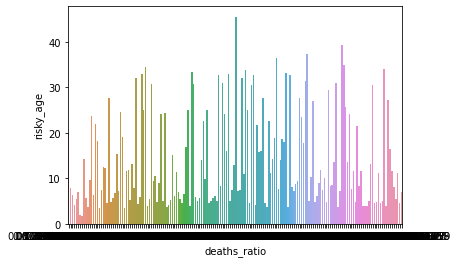

In [80]:
sns.barplot(x="deaths_ratio", y="risky_age", data=age)

<AxesSubplot:xlabel='deaths_ratio', ylabel='risky_age'>

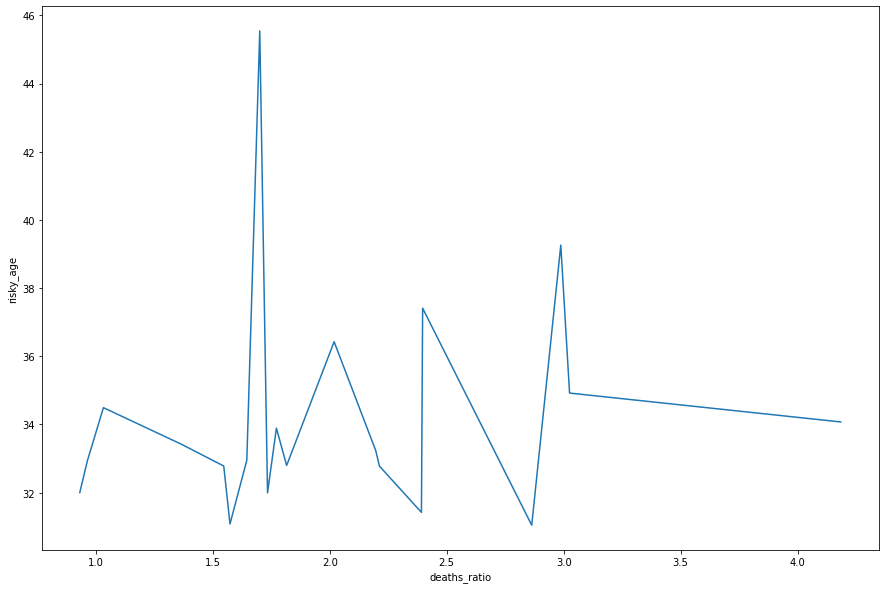

In [108]:
plt.figure(figsize=(15,10))
sns.lineplot(x="deaths_ratio", y="risky_age", data=age_sorted)


<AxesSubplot:xlabel='deaths_ratio', ylabel='risky_age'>

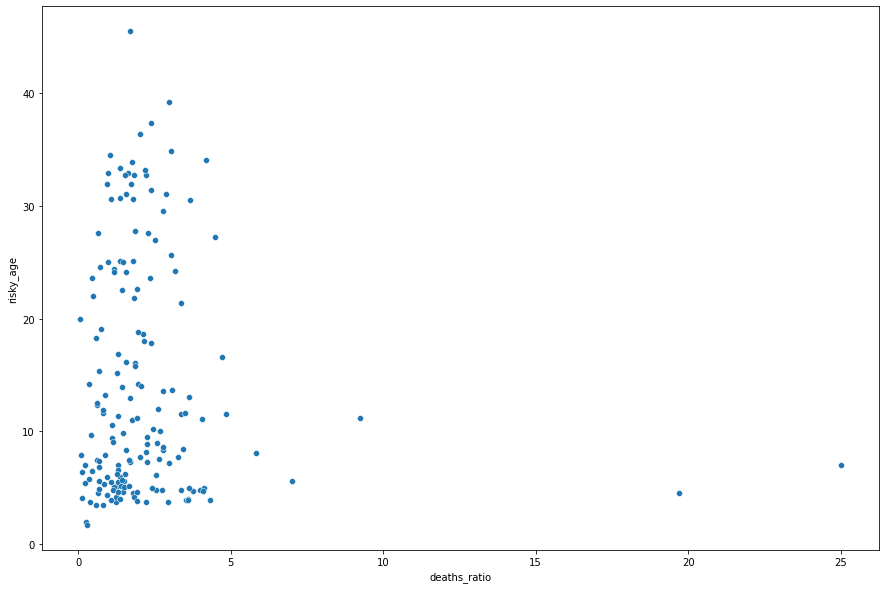

In [82]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="deaths_ratio", y="risky_age", data=age)

In [134]:
ratio_deaths_sort = ratio_deaths_grouby.sort_values(by="gdp_per_capita", ascending=False).head(20)


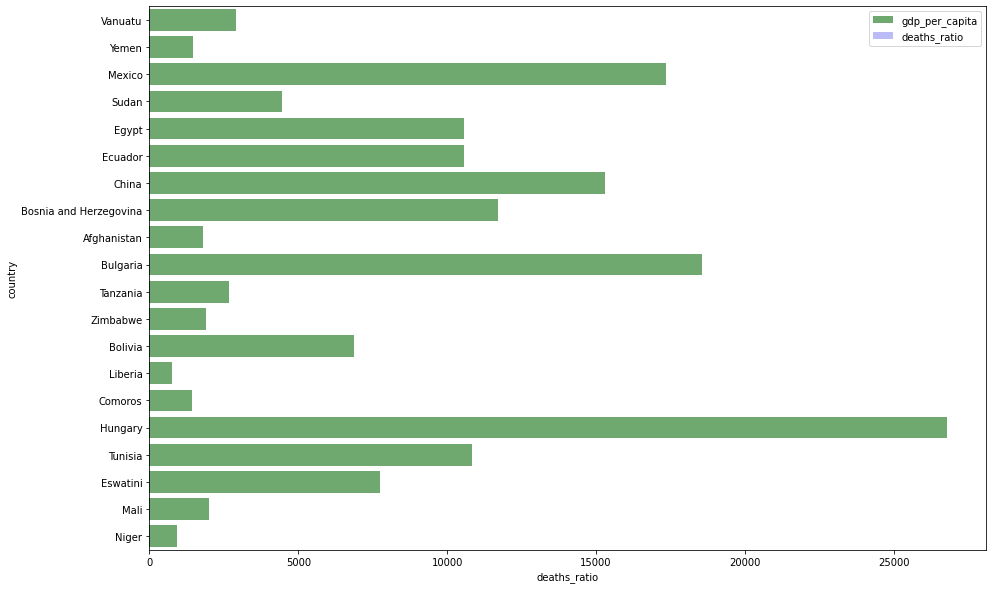

In [138]:

plt.figure(figsize=(15,10))
sns.barplot(x="gdp_per_capita", y="country", data=age_sorted, color="g", label="gdp_per_capita", alpha=0.6)
sns.barplot(x="deaths_ratio", y="country", data=age_sorted, color="b", alpha=0.3, label="deaths_ratio")
plt.legend()

In [ ]:
sns.lineplot(x="deaths_ratio", y="gdp_per_capita", data=ratio_deaths_grouby)

In [ ]:
sns.lineplot(x="gdp_per_capita", y="deaths_ratio", data=ratio_deaths_grouby)

In [ ]:
sns.pairplot(ratio_deaths_grouby)

<AxesSubplot:>

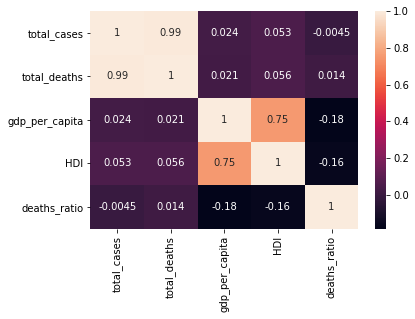

In [176]:
sns.heatmap(ratio_deaths_grouby.corr(), annot=True)

In [ ]:
sns.heatmap(covid.corr())

In [ ]:
ratio_deaths_grouby.to_csv("ratio_deaths_grouby_country.csv")

In [ ]:
covid.info()

In [ ]:
covid["gdp_per_capita"].values

In [ ]:
covid.drop(["weekly_icu_admissions", "weekly_icu_admissions_per_million"], axis=1, inplace=True)

In [ ]:
covid.keys()

In [169]:
ratio_deaths = covid.filter(["country", "total_cases", "total_deaths", "gdp_per_capita", "HDI", "hospital_beds_per_thousand", ], axis=1)
ratio_deaths = ratio_deaths.dropna()
ratio_deaths.reset_index(drop=True, inplace=True)
ratio_deaths_grouby["deaths_ratio"] = ratio_deaths_grouby["total_deaths"]/ratio_deaths_grouby["total_cases"] * 100
ratio_deaths

,country,total_cases,total_deaths,gdp_per_capita,HDI,hospital_beds_per_thousand
0,Afghanistan,34.0,1.0,1803.987,0.511,0.5
1,Afghanistan,41.0,1.0,1803.987,0.511,0.5
2,Afghanistan,43.0,1.0,1803.987,0.511,0.5
3,Afghanistan,76.0,2.0,1803.987,0.511,0.5
4,Afghanistan,80.0,3.0,1803.987,0.511,0.5
...,...,...,...,...,...,...
62853,Zimbabwe,38535.0,1582.0,1899.775,0.571,1.7
62854,Zimbabwe,38554.0,1582.0,1899.775,0.571,1.7
62855,Zimbabwe,38560.0,1582.0,1899.775,0.571,1.7
62856,Zimbabwe,38572.0,1582.0,1899.775,0.571,1.7
